# Week 1: Percolation theory 

Welcome to CPP! This is the jupyter notebook for the tasks of the first week. In this notebook, we will: 
1) Initialise a system 
2) Identify the clusters in the system 
3) Analyse various properties such as average size, probability of percolating, etc. 

I have added descriptions, links and hints; this assignment has been made such that google, stackexchange, and python documentation should be more than enough to do this easily. While I cannot control what you do, I encourage you to not go to LLMs to do these tasks. They are easy enough and are instructive and will help you learn more python, which vibecoding will not.

I will also encourage you to comment your code if you get time; it will help when you look back at the code when you are making your report. 

Feel free to ask doubts in the group or in my DMs! 

## 1. Initialising the system

In the cell below, write a function which takes in two values: $n$, which is the length of the square grid we are making, and $p$ which is the probability that a square is filled (or black), and returns a 2D array which will be our grid.

Hint: np.random.rand

In [53]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

def generate_grid(n, p):
    return (np.random.rand(n, n) < p).astype(int)

grid = generate_grid(50, 0.6)
grid

array([[1, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [1, 0, 1, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 0, 1, ..., 0, 0, 1]], shape=(50, 50))

## 2. Identifying and Labelling clusters: Hoshen Kopelman algorithm

From the previous section you now have a 2D numpy array which is a grid with "True" and "False" values. Your task now is to write a function that scans the grid and assigns a unique integer label to each connected cluster of occupied sites.

A cluster is defined as a group of occupied sites that are connected to each other through nearest neighbours (up, down, left, right). 

Define a function, which takes in the 2D array as input, and returns a new array labels of the same shape, where:

1) labels[i, j] = 0 if the site is empty
2) labels[i, j] = k if the site belongs to cluster k

Clusters that are connected (via nearest neighbours) must have the same label. This is the hardest part of the assignment. Not to worry, I have given a detailed outline of the algorithm below. Try to google, stackexchange and use python documentation before moving to some LLM; this is a good time to learn python, and vibe coding is not the same as learning. 

You can learn more about this algorithm in the following link: https://en.wikipedia.org/wiki/Hoshen%E2%80%93Kopelman_algorithm


In [54]:
def label_clusters(grid):
    nrows, ncols = grid.shape
    labels = np.zeros((nrows, ncols), dtype=int)

    parent = {}
    next_label = 1

    def find(x):
        while parent[x] != x:
            parent[x] = parent[parent[x]]
            x = parent[x]
        return x

    def union(x, y):
        rx, ry = find(x), find(y)
        if rx != ry:
            parent[ry] = rx

    for i in range(nrows):
        for j in range(ncols):
            if not grid[i, j]:
                continue

            neighbors = []

            if i > 0 and labels[i - 1, j] > 0:
                neighbors.append(labels[i - 1, j])

            if j > 0 and labels[i, j - 1] > 0:
                neighbors.append(labels[i, j - 1])

            if not neighbors:
                labels[i, j] = next_label
                parent[next_label] = next_label
                next_label += 1
            else:
                min_label = min(neighbors)
                labels[i, j] = min_label
                for lbl in neighbors:
                    union(min_label, lbl)

    label_map = {}
    new_label = 1

    for i in range(nrows):
        for j in range(ncols):
            if labels[i, j] > 0:
                root = find(labels[i, j])
                if root not in label_map:
                    label_map[root] = new_label
                    new_label += 1
                labels[i, j] = label_map[root]

    return labels

labeled_grid = label_clusters(grid)
labeled_grid

array([[1, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [8, 0, 9, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 0, 2, ..., 0, 0, 2]], shape=(50, 50))

## 3. Check if the system percolated 

Check if the system has percolated or not by checking if there is a cluster label appearing on opposite edges of the system. No hints for this one! 

In [ ]:
def has_percolated(labels):
    top = set(labels[0, :]) - {0}
    bottom = set(labels[-1, :]) - {0}
    if top & bottom:
        return True

    left = set(labels[:, 0]) - {0}
    right = set(labels[:, -1]) - {0}
    if left & right:
        return True

    return False

percolated = has_percolated(labeled_grid)
percolated

True

## 4. Visualise your grid! 

Visualisation is very important; it is very useful while debugging, also gives physical insights. Hint: use matplotlib's matshow to plot your grid along with the label of the cluster. You can also colour code the labels too! Check out the various colourmaps matplotlib has to offer. 

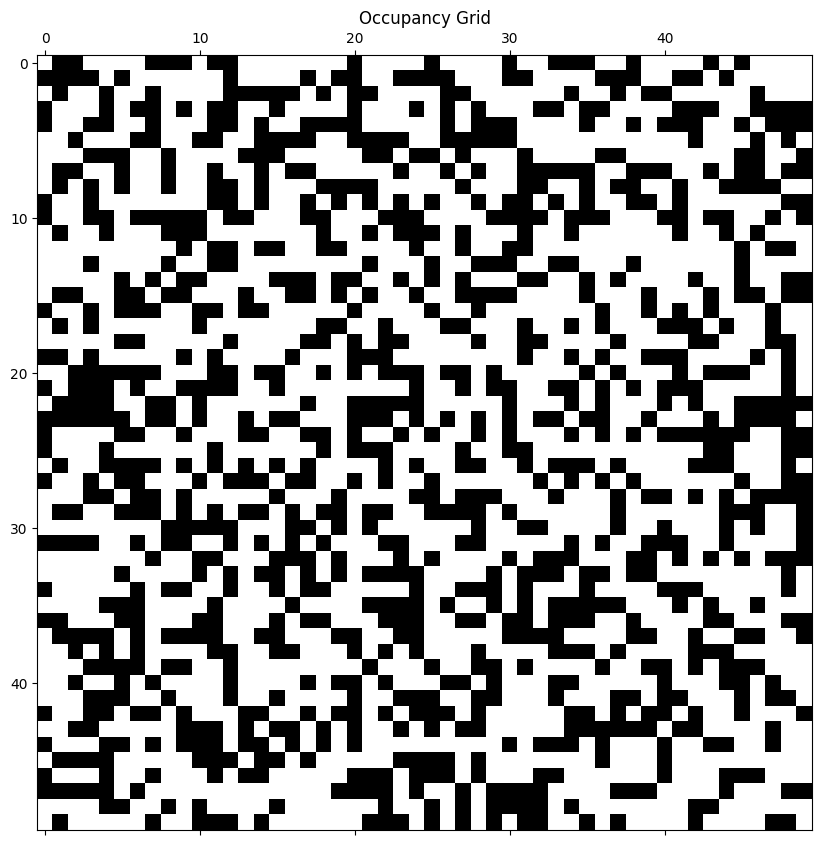

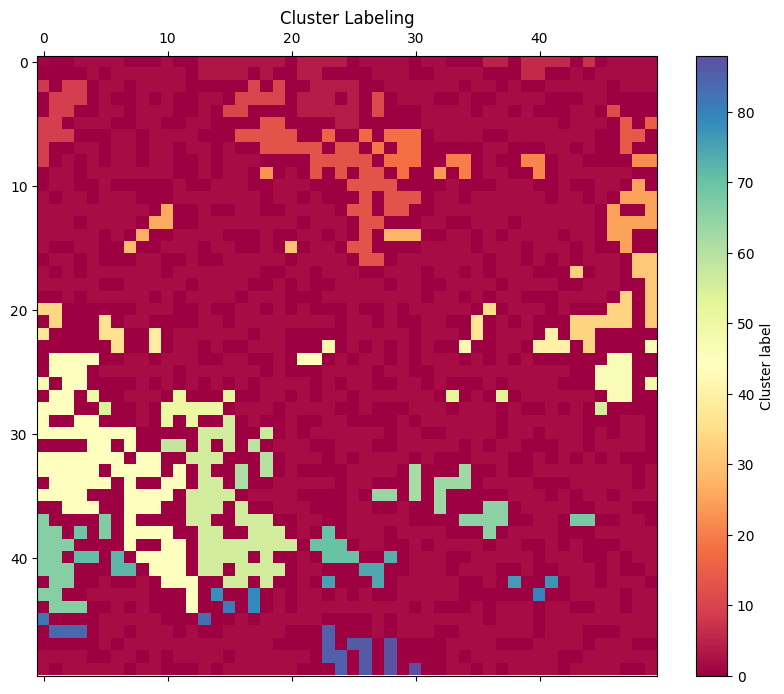

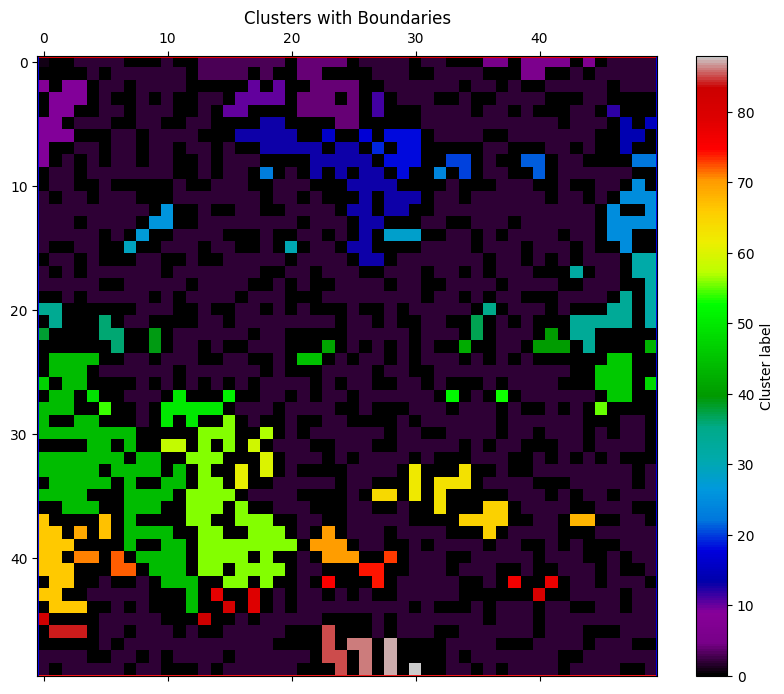

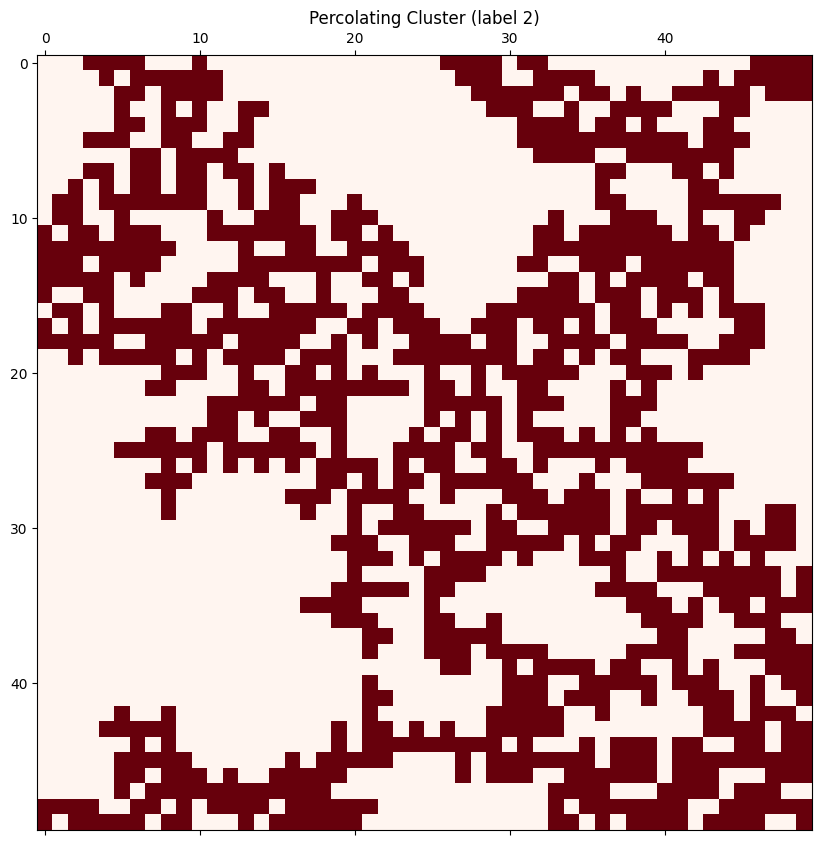

In [92]:
def plot_grid(grid):
    plt.figure(figsize=(10, 10))
    plt.matshow(grid, cmap="gray", fignum=1)
    plt.title("Occupancy Grid")
    plt.show()

def plot_labels(labels):
    plt.figure(figsize=(10, 8))
    plt.matshow(labels, cmap="Spectral", fignum=1)
    plt.colorbar(label="Cluster label")
    plt.title("Cluster Labeling")
    plt.show()

def plot_labels_with_boundaries(labels):
    n = labels.shape[0]

    plt.figure(figsize=(10, 8))
    plt.matshow(labels, cmap="nipy_spectral", fignum=1)

    plt.axhline(-0.5, color="red", linewidth=2)
    plt.axhline(n - 0.5, color="red", linewidth=2)
    plt.axvline(-0.5, color="blue", linewidth=2)
    plt.axvline(n - 0.5, color="blue", linewidth=2)

    plt.colorbar(label="Cluster label")
    plt.title("Clusters with Boundaries")
    plt.show()

def plot_percolating_cluster(labels):
    top = set(labels[0, :]) - {0}
    bottom = set(labels[-1, :]) - {0}
    perc = top & bottom

    if not perc:
        print("No percolating cluster")
        return

    k = perc.pop()
    mask = labels == k

    plt.figure(figsize=(10, 10))
    plt.matshow(mask, cmap="Reds", fignum=1)
    plt.title(f"Percolating Cluster (label {k})")
    plt.show()

plot_grid(grid)
plot_labels(labeled_grid)
plot_labels_with_boundaries(labeled_grid)
plot_percolating_cluster(labeled_grid)

### Analysis time! 

That's all the prep needed! Now for squares of length 8,16 and 32, find the following as a function of $p$

1) Find the weighted average of the cluster size. If the system is percolating, do not count the percolating cluster. 
2) Find percolation strength (this is the size of the percolating system divided by the size of the system. If system does not percolate, this value is 0)
3) Find the percolation rate (find the probability that the system will percolate)

Initialise $N$ number of systems and average over them to get probability. Plot these three using matplotlib. Based on these plots, give comments regarding your observations. If you see a phase transition, can you estimate its critical probability? 
   
You can learn more about percolation and these terms from the following reference: 
1) https://www.mit.edu/~levitov/8.334/notes/percol_notes.pdf

The reference is advanced, so don't worry if you cannot understand it fully. 

In [69]:
def compute_observables(labeled_grid):
    n = labeled_grid.shape[0]
    labels, counts = np.unique(labeled_grid, return_counts=True)
    cluster_sizes = dict(zip(labels, counts))
    cluster_sizes.pop(0, None)

    top = set(labeled_grid[0, :]) - {0}
    bottom = set(labeled_grid[-1, :]) - {0}
    perc_labels = top & bottom

    if perc_labels:
        perc_label = perc_labels.pop()
        P_inf = cluster_sizes[perc_label] / (n * n)
        cluster_sizes.pop(perc_label)
        percolates = 1
    else:
        P_inf = 0.0
        percolates = 0

    if cluster_sizes:
        sizes = np.array(list(cluster_sizes.values()))
        S = np.sum(sizes**2) / np.sum(sizes)
    else:
        S = 0.0

    return S, P_inf, percolates

In [70]:
def run_statistics(n, p_values, N):
    S_avg, Pinf_avg, perc_rate = [], [], []

    for p in p_values:
        S_list, P_list, perc_list = [], [], []

        for _ in range(N):
            grid = generate_grid(n, p)
            labeled_grid = label_clusters(grid)

            S, Pinf, perc = compute_observables(labeled_grid)
            S_list.append(S)
            P_list.append(Pinf)
            perc_list.append(perc)

        S_avg.append(np.mean(S_list))
        Pinf_avg.append(np.mean(P_list))
        perc_rate.append(np.mean(perc_list))

    return np.array(S_avg), np.array(Pinf_avg), np.array(perc_rate)

In [88]:
p_values = np.linspace(0.3, 0.8, 40)
N = 300
sizes = [8, 16, 32]

results = {}

for n in sizes:
    results[n] = run_statistics(n, p_values, N)

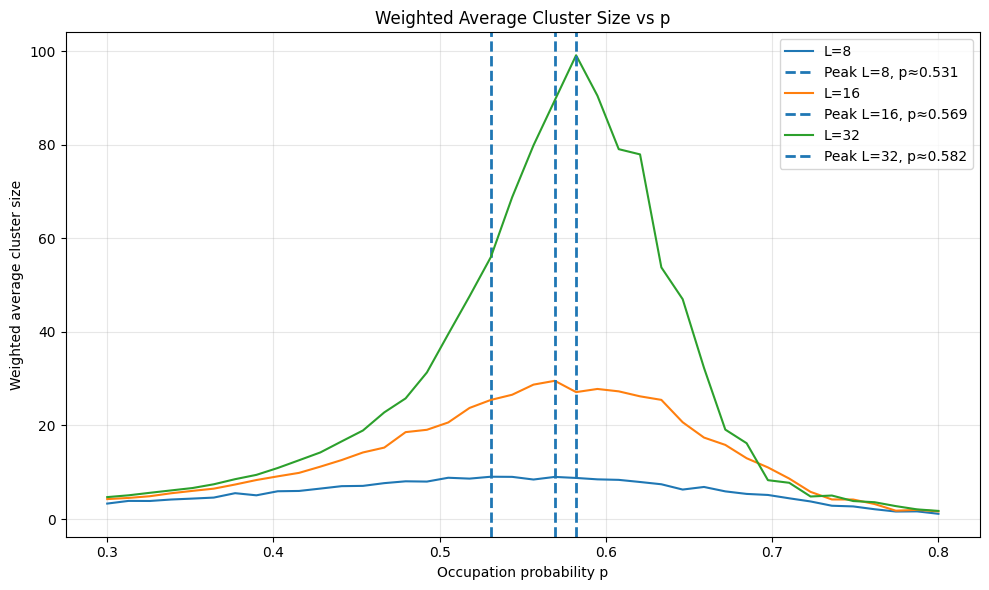

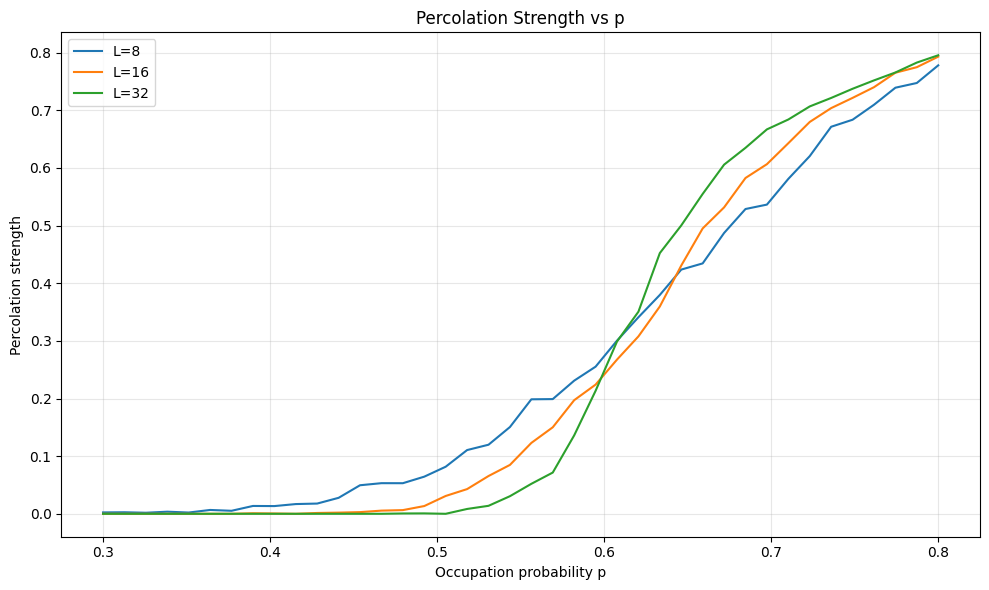

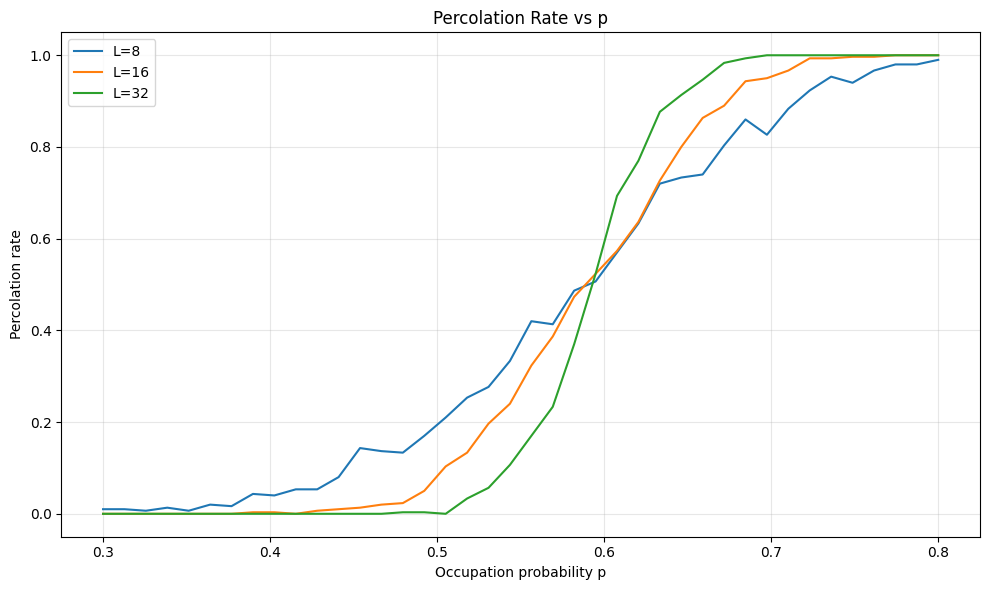

In [ ]:
plt.figure(figsize=(10, 6))
for n in sizes:
    S, _, _ = results[n]
    p_peak = p_values[np.argmax(S)]

    plt.plot(p_values, S, label=f"L={n}")
    plt.axvline(
        p_peak,
        linestyle="--",
        linewidth=2,
        label=f"Peak L={n}, p≈{p_peak:.3f}"
    )

plt.xlabel("Occupation probability p")
plt.ylabel("Weighted average cluster size")
plt.title("Weighted Average Cluster Size vs p")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
for n in sizes:
    _, Pinf, _ = results[n]
    plt.plot(p_values, Pinf, label=f"L={n}")

plt.xlabel("Occupation probability p")
plt.ylabel("Percolation strength")
plt.title("Percolation Strength vs p")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
for n in sizes:
    _, _, rate = results[n]
    plt.plot(p_values, rate, label=f"L={n}")

plt.xlabel("Occupation probability p")
plt.ylabel("Percolation rate")
plt.title("Percolation Rate vs p")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Bonus: Bethe lattice

Read about the Bethe lattice: https://en.wikipedia.org/wiki/Bethe_lattice 

Can you find its critical probability? It's a very neat answer and does not require code. 

We can calculate, mean offspring $= p(z−1)$, where z represents the no. of neighbours to the root  
Therefore, $p_c = 1/(z-1)$  

for e.g., for a 3-coordinated Bethe lattice $(z=3)$:
$$ p_c = 1/2 $$

## Bonus 2.0: Bond percolation 

Find what bond percolation is and try out the above tasks for 2D lattice but with bonds instead of filled/unfilled sites. This is trickier though, so try this if you have time. Is the critical probability same or different? 